# Data Load

In [111]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [112]:
#Read datasets

data_train = pd.read_csv('kendaraan_train.csv', sep=',', na_values='?')
data_test = pd.read_csv('kendaraan_test.csv', sep=',', na_values='?')
print('Data Train: ')
display(data_train)
print('\n')
print('Data Test: ')
display(data_test)

Data Train: 


,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0




Data Test: 


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [113]:
# Merge data train and data test
feature = ['Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan', 'Tertarik']
data = data_train[feature].append(data_test, ignore_index=True) 
data

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
333465,Pria,61.0,1.0,46.0,0.0,> 2 Tahun,Pernah,31039.0,124.0,67.0,0
333466,Pria,41.0,1.0,15.0,0.0,1-2 Tahun,Pernah,2630.0,157.0,232.0,0
333467,Pria,24.0,1.0,29.0,1.0,< 1 Tahun,Tidak,33101.0,152.0,211.0,0
333468,Pria,59.0,1.0,30.0,0.0,1-2 Tahun,Pernah,37788.0,26.0,239.0,1


# Data Exploration and Preprocessing

**Exploration**

In [114]:
print('Data Type Tiap Column: \n')
print(data.dtypes, '\n')
print('Banyak Missing Values Tiap Column: \n')
print(data.isna().sum())

Data Type Tiap Column: 

Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object 

Banyak Missing Values Tiap Column: 

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64


In [32]:
data['Jenis_Kelamin'].value_counts()

Pria      172548
Wanita    146482
Name: Jenis_Kelamin, dtype: int64

In [33]:
data['Umur_Kendaraan'].value_counts()

1-2 Tahun    167727
< 1 Tahun    138070
> 2 Tahun     13398
Name: Umur_Kendaraan, dtype: int64

In [34]:
data['Kendaraan_Rusak'].value_counts()

Pernah    161164
Tidak     158118
Name: Kendaraan_Rusak, dtype: int64

**Dealing with missing values**

Categorical values

In [115]:
# Filling missing values in Categorical feature with Mode

data['Jenis_Kelamin'] = data['Jenis_Kelamin'].fillna(data[['Jenis_Kelamin']].mode()['Jenis_Kelamin'][0])
data['Umur_Kendaraan'] = data['Umur_Kendaraan'].fillna(data[['Umur_Kendaraan']].mode()['Umur_Kendaraan'][0])
data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].fillna(data[['Kendaraan_Rusak']].mode()['Kendaraan_Rusak'][0])
data['SIM'] = data['SIM'].fillna(data[['SIM']].mode()['SIM'][0])
data['Sudah_Asuransi'] = data['Sudah_Asuransi'].fillna(data[['Sudah_Asuransi']].mode()['Sudah_Asuransi'][0])

Numerical values

In [116]:
# Filling missing values in Kode Daerah feature with Median
data['Kode_Daerah'] = data['Kode_Daerah'].fillna(data['Kode_Daerah'].median())


# Filling missing values in Numerical feature with Mean
for i in feature:
  if (data[i].isna().sum() != 0):
    data[i] = data[i].fillna(data[i].mean())

Checking missing values

In [117]:
print('Check Missing Values: \n')
print(data.isna().sum())

Check Missing Values: 

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


**Data Tranformation**

In [118]:
# Encode feature with categorical values to numerical

data['Jenis_Kelamin'] = data['Jenis_Kelamin'].replace({'Wanita':1, 'Pria':0})
data['Umur_Kendaraan'] = data['Umur_Kendaraan'].replace({'< 1 Tahun':3, '1-2 Tahun':2, '> 2 Tahun':1})
data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].replace({'Tidak':2, 'Pernah':1})

In [119]:
data

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,3,2,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,1,1,25800.0,29.0,158.0,0
2,0,21.0,1.0,46.0,1.0,3,2,32733.0,160.0,119.0,0
3,1,58.0,1.0,48.0,0.0,2,2,2630.0,124.0,63.0,0
4,0,50.0,1.0,35.0,0.0,1,1,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
333465,0,61.0,1.0,46.0,0.0,1,1,31039.0,124.0,67.0,0
333466,0,41.0,1.0,15.0,0.0,2,1,2630.0,157.0,232.0,0
333467,0,24.0,1.0,29.0,1.0,3,2,33101.0,152.0,211.0,0
333468,0,59.0,1.0,30.0,0.0,2,1,37788.0,26.0,239.0,1


**Duplicate Data**

In [120]:
# Counting duplicate data in dataframe
data.duplicated().sum()

357

In [121]:
# Remove duplicate data
data.drop_duplicates(inplace=True)
data

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,3,2,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,1,1,25800.0,29.0,158.0,0
2,0,21.0,1.0,46.0,1.0,3,2,32733.0,160.0,119.0,0
3,1,58.0,1.0,48.0,0.0,2,2,2630.0,124.0,63.0,0
4,0,50.0,1.0,35.0,0.0,1,1,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
333465,0,61.0,1.0,46.0,0.0,1,1,31039.0,124.0,67.0,0
333466,0,41.0,1.0,15.0,0.0,2,1,2630.0,157.0,232.0,0
333467,0,24.0,1.0,29.0,1.0,3,2,33101.0,152.0,211.0,0
333468,0,59.0,1.0,30.0,0.0,2,1,37788.0,26.0,239.0,1


**Scalling Data**

In [122]:
# Scalling dataframe with MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = data.columns

data_scaled = scaler.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=cols)

In [123]:
data

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,0.153846,1.0,0.634615,1.0,1.0,1.0,0.047251,0.932099,0.301038,0.0
1,0.0,0.430769,1.0,0.750000,0.0,0.0,0.0,0.043104,0.172840,0.512111,0.0
2,0.0,0.015385,1.0,0.884615,1.0,1.0,1.0,0.056002,0.981481,0.377163,0.0
3,1.0,0.584615,1.0,0.923077,0.0,0.5,1.0,0.000000,0.759259,0.183391,0.0
4,0.0,0.461538,1.0,0.673077,0.0,0.0,0.0,0.059953,0.537037,0.636678,0.0
...,...,...,...,...,...,...,...,...,...,...,...
333108,0.0,0.630769,1.0,0.884615,0.0,0.0,0.0,0.052851,0.759259,0.197232,0.0
333109,0.0,0.323077,1.0,0.288462,0.0,0.5,0.0,0.000000,0.962963,0.768166,0.0
333110,0.0,0.061538,1.0,0.557692,1.0,1.0,1.0,0.056687,0.932099,0.695502,0.0
333111,0.0,0.600000,1.0,0.576923,0.0,0.5,0.0,0.065406,0.154321,0.792388,1.0


# Feature Selection

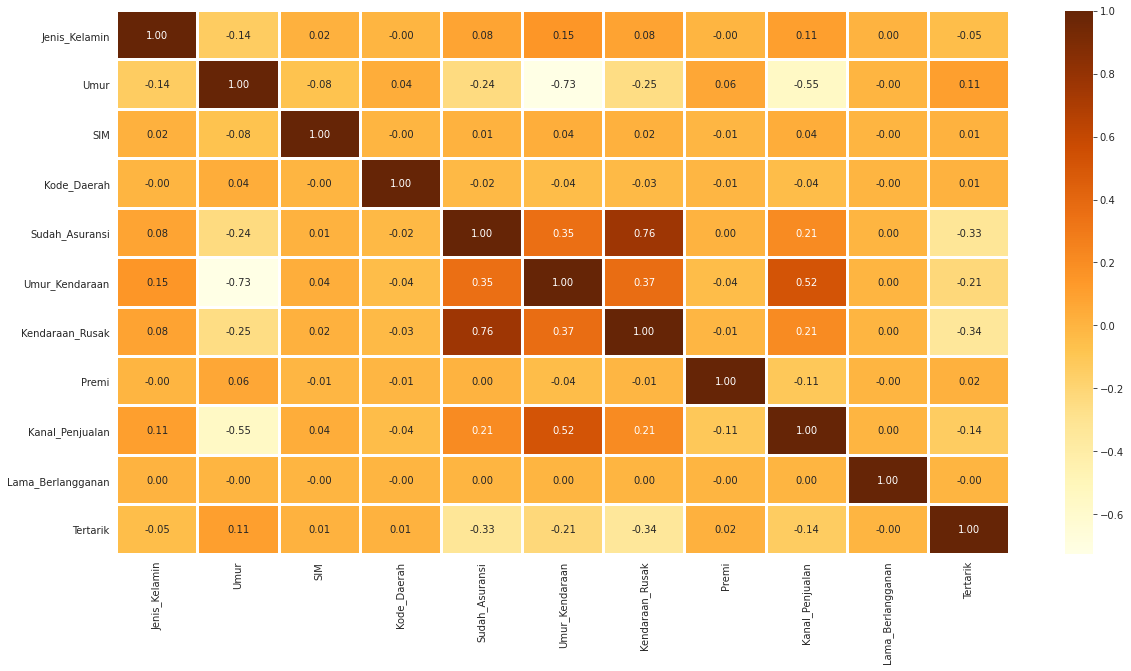

In [124]:
# Show correlation values of each feature to data target ('Tertarik')

sns.set({'figure.figsize':(20,10)})
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths= 2, cmap="YlOrBr")

In [125]:
# Selecting feature based on correlation values
# Feature with lowest correlation values to the data target will be dropped
data2 = data[['Umur', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Kanal_Penjualan']]
data2

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Kanal_Penjualan
0,0.153846,1.0,1.0,1.0,0.932099
1,0.430769,0.0,0.0,0.0,0.172840
2,0.015385,1.0,1.0,1.0,0.981481
3,0.584615,0.0,0.5,1.0,0.759259
4,0.461538,0.0,0.0,0.0,0.537037
...,...,...,...,...,...
333108,0.630769,0.0,0.0,0.0,0.759259
333109,0.323077,0.0,0.5,0.0,0.962963
333110,0.061538,1.0,1.0,1.0,0.932099
333111,0.600000,0.0,0.5,0.0,0.154321


**Outliers**

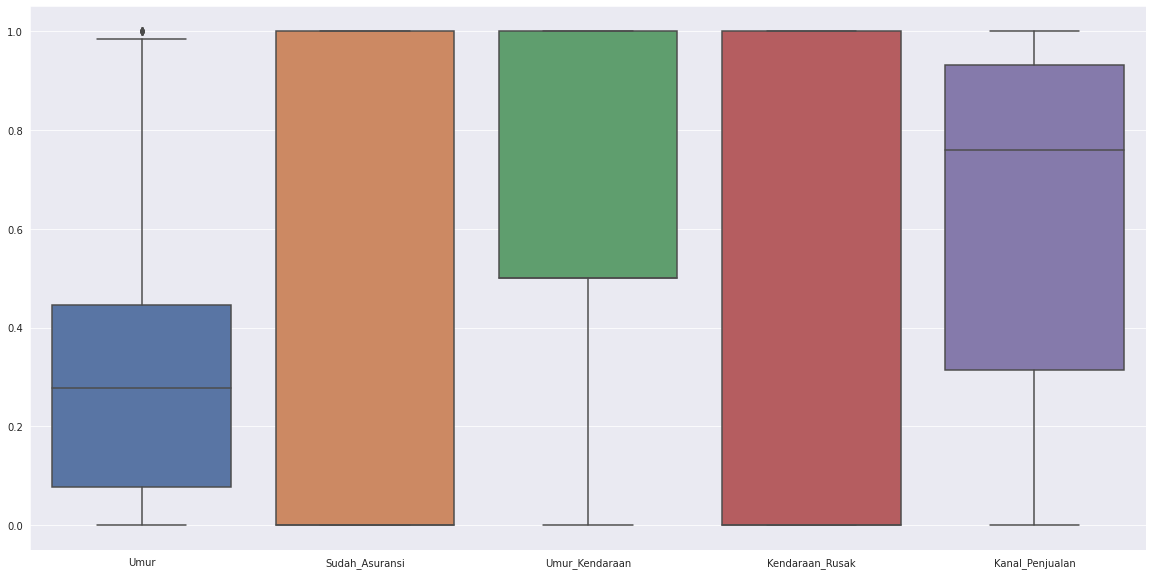

In [126]:
# Checking outliers in selected feature
sns.boxplot(data=data2)

In [127]:
# Removing Outliers from selected feature
q1 = np.percentile(data.Premi,25)
q3 = np.percentile(data.Premi,75)
iqr = q3 - q1
lower_bound = q1 - ( iqr * 1.5)
upper_bound = q3 + ( iqr * 1.5)
data_new = data2[(data2['Umur']>lower_bound) & (data2['Umur']<upper_bound)]

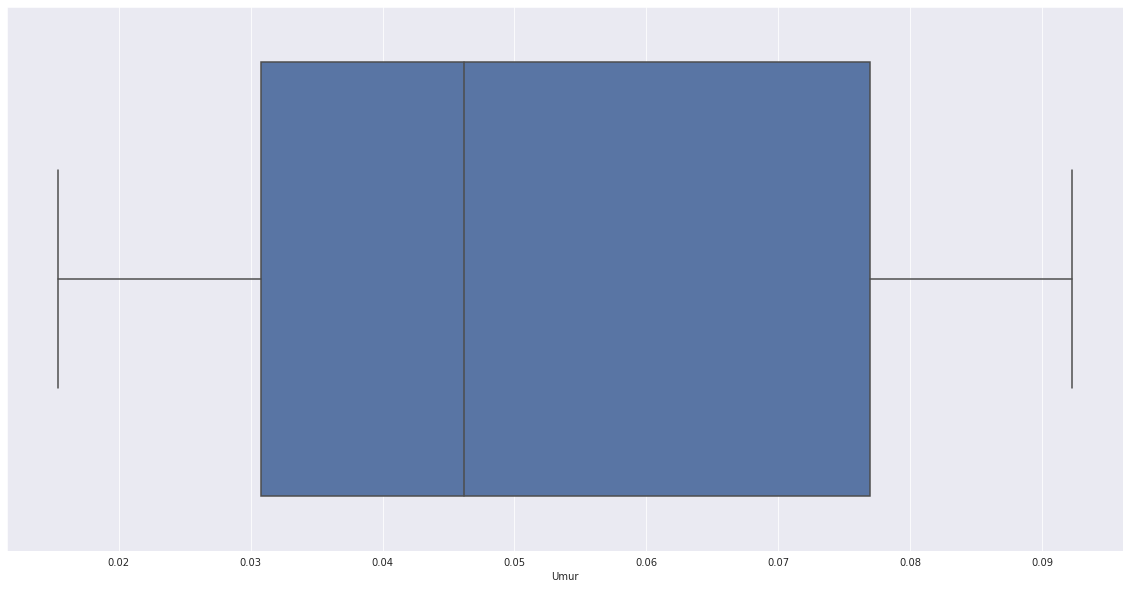

In [128]:
# Proving no outliers left in Umur
sns.boxplot(x='Umur', data=data_new)

# Demensional Reduction

In [129]:
# Using Principal Components Analysis to reduce the demension of selected dataframe for clustering
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
p_component = pca.fit_transform(data2)
p_data = pd.DataFrame(p_component)

In [130]:
p_data

,0,1
0,-0.859050,-0.155234
1,0.868181,0.560669
2,-0.886261,-0.250506
3,0.005074,0.177210
4,0.809891,0.321145
...,...,...
333108,0.794690,0.241233
333109,0.611762,-0.278376
333110,-0.871545,-0.195872
333111,0.787921,0.405442


# Data Distribution

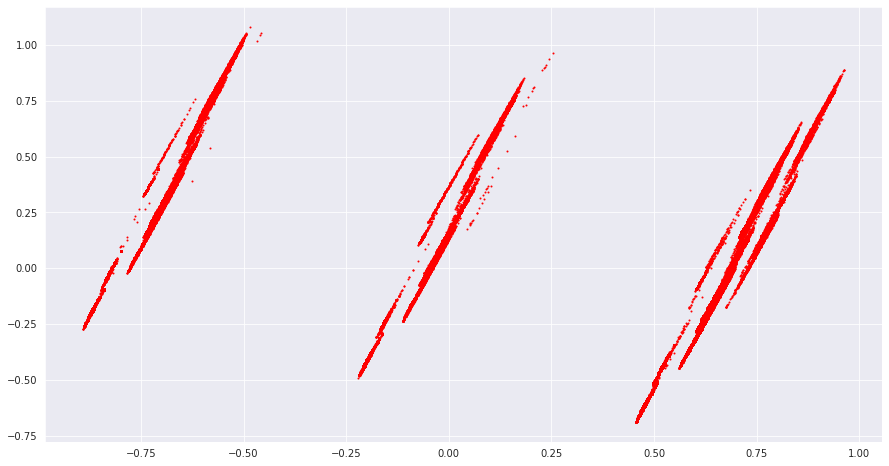

In [131]:
# show data distrubution of the principal data (p_data)
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(p_data[0], p_data[1], color='red', s=1)

# Clustering

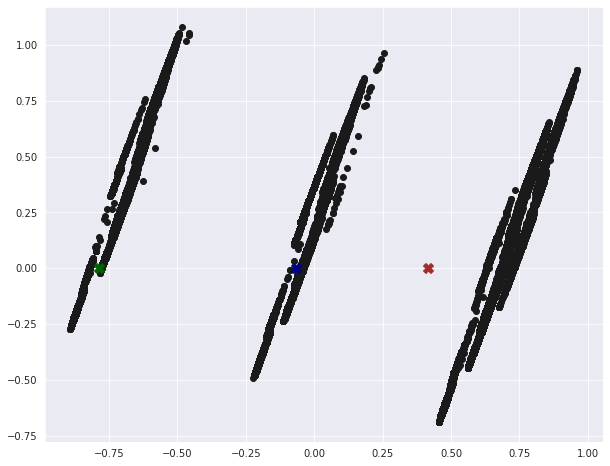

{1: [-0.06658106617933202, 0], 2: [0.41578139115203294, 0], 3: [-0.7869746330155096, 0]}


In [132]:
# Initialize centroid random to determine group of data
# K = 3
k = 3
centroids = {
    i+1: [np.random.uniform(-1, 1), np.random.randint(-0.75, 1.5)]
    for i in range(k)
}

fig = plt.figure(figsize=(10,8))
plt.scatter(p_data[0], p_data[1], color='k')
colors = {1: 'darkblue', 2:'brown',3:'darkgreen'}

for i in centroids.keys():
  plt.scatter(*centroids[i], color=colors[i], marker='X', s=100)

plt.show()
print(centroids)

**Grouping Data Point to Nearest Centroid**

In [133]:
# Grouping each data point to the nearest centroid

def grouping(p_data, centroids):
  for i in centroids.keys():
    # Euclidean Distance
    p_data['distance_from_c{}'.format(i)] = (np.sqrt( (p_data[0]-centroids[i][0])**2 + (p_data[1]-centroids[i][1])**2 ))

  centroid_dist_col = ['distance_from_c{}'.format(i) for i in centroids.keys()]
  p_data['closest_centroid']  = p_data.loc[:, centroid_dist_col].idxmin(axis=1)
  p_data['closest_centroid'] = p_data['closest_centroid'].map(lambda x: int(x.lstrip('distance_from_c')))
  p_data['color'] = p_data['closest_centroid'].map(lambda x: colors[x])
  return p_data


**Updating New Centroid Based On Mean of The Group**

In [134]:
# old_centroids = copy.deepcopy(centroids)

def update_centroid(x):
    for i in x.keys():
        x[i][0] = np.mean(p_data[p_data['closest_centroid'] == i][0])
        x[i][1] = np.mean(p_data[p_data['closest_centroid'] == i][1])
    return x


**Loop Clustering**

In [135]:
# loop the grouping method and update centroid until centroid not moving anymore

# Fist Time Grouping
p_data = grouping(p_data, centroids)

# Initialize stop con
# check_centroid = p_data['closest_centroid'].copy(deep=True)

while True:
  check_centroid = p_data['closest_centroid'].copy(deep=True)
  centroids = update_centroid(centroids)
  p_data = grouping(p_data, centroids)
  if check_centroid.equals(p_data['closest_centroid']):
    break

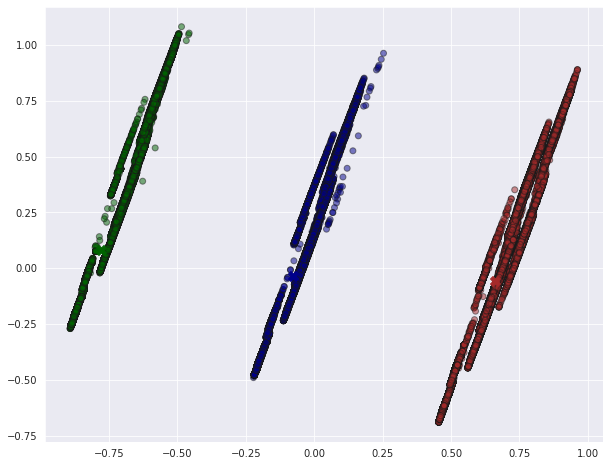

In [136]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(p_data[0], p_data[1], color=p_data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colors[i], marker='X', s=100)

plt.show()

# Export Final dataset

In [137]:
p_data.to_csv('final_dataset.csv')

In [138]:
p_data

,0,1,distance_from_c1,distance_from_c2,distance_from_c3,closest_centroid,color
0,-0.859050,-0.155234,0.790085,1.521676,0.250985,3,darkgreen
1,0.868181,0.560669,1.118795,0.653945,1.716314,2,brown
2,-0.886261,-0.250506,0.836180,1.557652,0.350008,3,darkgreen
3,0.005074,0.177210,0.229217,0.695872,0.791043,1,darkblue
4,0.809891,0.321145,0.957144,0.408887,1.607960,2,brown
...,...,...,...,...,...,...,...
333108,0.794690,0.241233,0.915750,0.329335,1.582959,2,brown
333109,0.611762,-0.278376,0.730908,0.224416,1.438275,2,brown
333110,-0.871545,-0.195872,0.809455,1.537228,0.293493,3,darkgreen
333111,0.787921,0.405442,0.972106,0.481957,1.601057,2,brown


p_data

# Experiment and Evaluation

In [27]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sil_score = []

for n_cluster in range(2, 7):
  kmeans = KMeans(n_cluster).fit(p_data)
  label = kmeans.labels_
  sil_coef = silhouette_score(p_data, label, metric='euclidean')
  sil_score.append(sil_coef)
  print('Nilai Silhouette Method untuk n_cluster = {} adalah {}'.format(n_cluster, sil_coef))

Nilai Silhouette Method untuk n_cluster = 2 adalah 0.6112094467816658
Nilai Silhouette Method untuk n_cluster = 3 adalah 0.5438697301338059
Nilai Silhouette Method untuk n_cluster = 4 adalah 0.5689183446401981


KeyboardInterrupt: ignored